<a href="https://colab.research.google.com/github/J-Jumanah/Data-Science-and-Machine-Learning/blob/main/Prediction_of_Nursey_Target.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> Prediction of Nursey Target
>> Jumanah Jan



```
The dataset called Nursey its contained 12959 Instances and 9 features.
Brief description: It was derived from a hierarchical decision model originally developed to rank applications for nursery schools.

The source: ( https://www.kaggle.com/datasets/heitornunes/nursery ).
```



# 1- Data Cleaning

In [ ]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Read data from CSV file
data = pd.read_csv("/content/nursery.csv")
data

,parents,has_nurs,form,children,housing,finance,social,health,final evaluation
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
...,...,...,...,...,...,...,...,...,...
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority,spec_prior
12956,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom,not_recom
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended,spec_prior
12958,great_pret,very_crit,foster,more,critical,inconv,problematic,priority,spec_prior


In [ ]:
#Explore the data
data.head(10)

,parents,has_nurs,form,children,housing,finance,social,health,final evaluation
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
5,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom
6,usual,proper,complete,1,convenient,convenient,problematic,recommended,priority
7,usual,proper,complete,1,convenient,convenient,problematic,priority,priority
8,usual,proper,complete,1,convenient,convenient,problematic,not_recom,not_recom
9,usual,proper,complete,1,convenient,inconv,nonprob,recommended,very_recom


In [ ]:
#Last 10 rows
data.tail(10)

,parents,has_nurs,form,children,housing,finance,social,health,final evaluation
12950,great_pret,very_crit,foster,more,critical,convenient,problematic,not_recom,not_recom
12951,great_pret,very_crit,foster,more,critical,inconv,nonprob,recommended,spec_prior
12952,great_pret,very_crit,foster,more,critical,inconv,nonprob,priority,spec_prior
12953,great_pret,very_crit,foster,more,critical,inconv,nonprob,not_recom,not_recom
12954,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,recommended,spec_prior
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority,spec_prior
12956,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom,not_recom
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended,spec_prior
12958,great_pret,very_crit,foster,more,critical,inconv,problematic,priority,spec_prior
12959,great_pret,very_crit,foster,more,critical,inconv,problematic,not_recom,not_recom


In [ ]:
#The shape
data.shape

(12960, 9)

In [ ]:
#The column
data.columns

Index(['parents', 'has_nurs', 'form', 'children', 'housing', 'finance',
       'social', 'health', 'final evaluation'],
      dtype='object')



```
The target is [final evaluation]
```



In [ ]:
#Rename column
data.rename(columns={'final evaluation':'final_evaluation'}, inplace=True)

In [ ]:
#Description of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   parents           12960 non-null  object
 1   has_nurs          12960 non-null  object
 2   form              12960 non-null  object
 3   children          12960 non-null  object
 4   housing           12960 non-null  object
 5   finance           12960 non-null  object
 6   social            12960 non-null  object
 7   health            12960 non-null  object
 8   final_evaluation  12960 non-null  object
dtypes: object(9)
memory usage: 911.4+ KB


In [ ]:
#Check the null
data.isnull().sum()

parents             0
has_nurs            0
form                0
children            0
housing             0
finance             0
social              0
health              0
final_evaluation    0
dtype: int64



```
No missing valuse
```



In [ ]:
#Check for duplicate rows
data.duplicated().sum()

0



```
No duplicate valuse
```



In [ ]:
#Check for outliers (Five point summury)
data.describe()

,parents,has_nurs,form,children,housing,finance,social,health,final_evaluation
count,12960,12960,12960,12960,12960,12960,12960,12960,12960
unique,3,5,4,4,3,2,3,3,5
top,usual,proper,complete,1,convenient,convenient,nonprob,recommended,not_recom
freq,4320,2592,3240,3240,4320,6480,4320,4320,4320


In [ ]:
#Frequancy of values
for i in data:
  print(data[i].value_counts(),"\n")
  print("--------------------")

usual          4320
pretentious    4320
great_pret     4320
Name: parents, dtype: int64 

--------------------
proper         2592
less_proper    2592
improper       2592
critical       2592
very_crit      2592
Name: has_nurs, dtype: int64 

--------------------
complete      3240
completed     3240
incomplete    3240
foster        3240
Name: form, dtype: int64 

--------------------
1       3240
2       3240
3       3240
more    3240
Name: children, dtype: int64 

--------------------
convenient    4320
less_conv     4320
critical      4320
Name: housing, dtype: int64 

--------------------
convenient    6480
inconv        6480
Name: finance, dtype: int64 

--------------------
nonprob          4320
slightly_prob    4320
problematic      4320
Name: social, dtype: int64 

--------------------
recommended    4320
priority       4320
not_recom      4320
Name: health, dtype: int64 

--------------------
not_recom     4320
priority      4266
spec_prior    4044
very_recom     328
recommend 

In [ ]:
#Checking the column values
for i in data:
  print(data[i].name)
  print(data[i].unique(),"\n")
  print("--------------------")

parents
['usual' 'pretentious' 'great_pret'] 

--------------------
has_nurs
['proper' 'less_proper' 'improper' 'critical' 'very_crit'] 

--------------------
form
['complete' 'completed' 'incomplete' 'foster'] 

--------------------
children
['1' '2' '3' 'more'] 

--------------------
housing
['convenient' 'less_conv' 'critical'] 

--------------------
finance
['convenient' 'inconv'] 

--------------------
social
['nonprob' 'slightly_prob' 'problematic'] 

--------------------
health
['recommended' 'priority' 'not_recom'] 

--------------------
final_evaluation
['recommend' 'priority' 'not_recom' 'very_recom' 'spec_prior'] 

--------------------


# 2- Data Processing

In [ ]:
#Transform categorical data into numerical data
le= LabelEncoder()
pData = data.copy()

pData['parents'] = le.fit_transform(pData.parents)
pData['has_nurs'] = le.fit_transform(pData.has_nurs)
pData['form'] = le.fit_transform(pData.form)
pData['children'] = le.fit_transform(pData.children)
pData['housing'] = le.fit_transform(pData.housing)
pData['finance'] = le.fit_transform(pData.finance)
pData['social'] = le.fit_transform(pData.social)
pData['health'] = le.fit_transform(pData.health)
pData['final_evaluation'] = le.fit_transform(pData.final_evaluation)

pData

,parents,has_nurs,form,children,housing,finance,social,health,final_evaluation
0,2,3,0,0,0,0,0,2,2
1,2,3,0,0,0,0,0,1,1
2,2,3,0,0,0,0,0,0,0
3,2,3,0,0,0,0,2,2,2
4,2,3,0,0,0,0,2,1,1
...,...,...,...,...,...,...,...,...,...
12955,0,4,2,3,1,1,2,1,3
12956,0,4,2,3,1,1,2,0,0
12957,0,4,2,3,1,1,1,2,3
12958,0,4,2,3,1,1,1,1,3


In [ ]:
pData.max()

parents             2
has_nurs            4
form                3
children            3
housing             2
finance             1
social              2
health              2
final_evaluation    4
dtype: int64

In [ ]:
pData.min()

parents             0
has_nurs            0
form                0
children            0
housing             0
finance             0
social              0
health              0
final_evaluation    0
dtype: int64



```
No need for Normalization because the data in same range
```



In [ ]:
#Check for outliers (Five point summury)
pData.describe()

,parents,has_nurs,form,children,housing,finance,social,health,final_evaluation
count,12960.000000,12960.000000,12960.000000,12960.000000,12960.000000,12960.000000,12960.000000,12960.000000,12960.000000
mean,1.000000,2.000000,1.500000,1.500000,1.000000,0.500000,1.000000,1.000000,1.366821
std,0.816528,1.414268,1.118077,1.118077,0.816528,0.500019,0.816528,0.816528,1.294212
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.750000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,1.500000,1.500000,1.000000,0.500000,1.000000,1.000000,1.000000
75%,2.000000,3.000000,2.250000,2.250000,2.000000,1.000000,2.000000,2.000000,3.000000
max,2.000000,4.000000,3.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000


In [ ]:
#Save the cleaned dataset
pData.to_csv('cleaned_Nursery.csv', index=False)

# 3- Data Visualization

In [ ]:
vData = pd.read_csv("/content/cleaned_Nursery.csv")
vData.head()

,parents,has_nurs,form,children,housing,finance,social,health,final_evaluation
0,2,3,0,0,0,0,0,2,2
1,2,3,0,0,0,0,0,1,1
2,2,3,0,0,0,0,0,0,0
3,2,3,0,0,0,0,2,2,2
4,2,3,0,0,0,0,2,1,1


## Before Data Processing

### Barplot

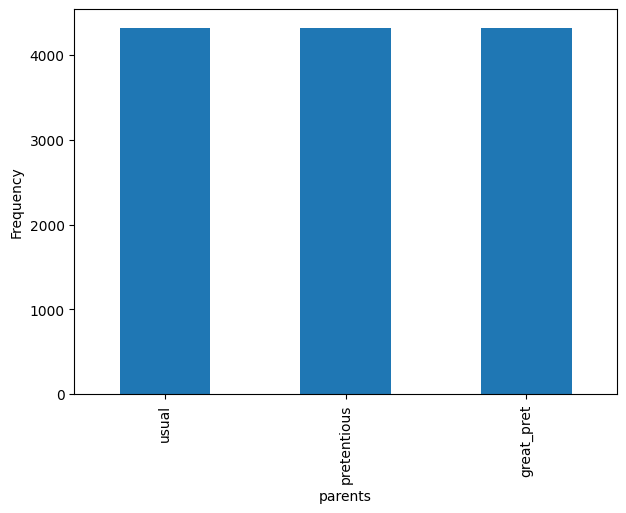

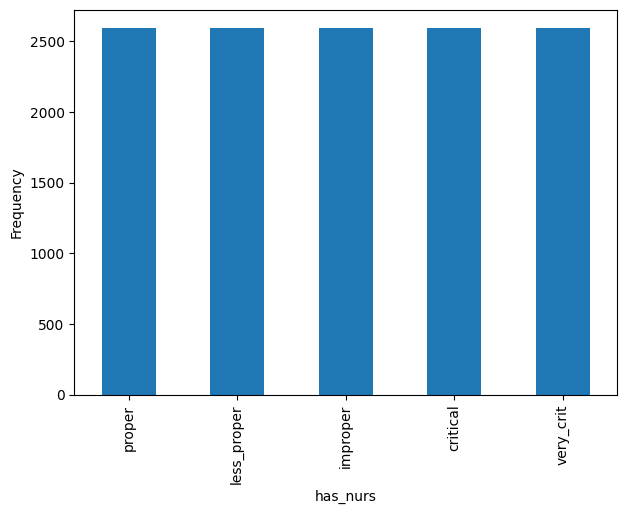

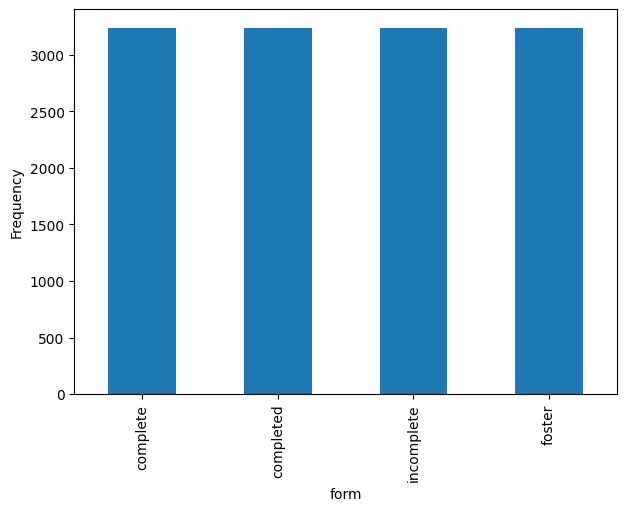

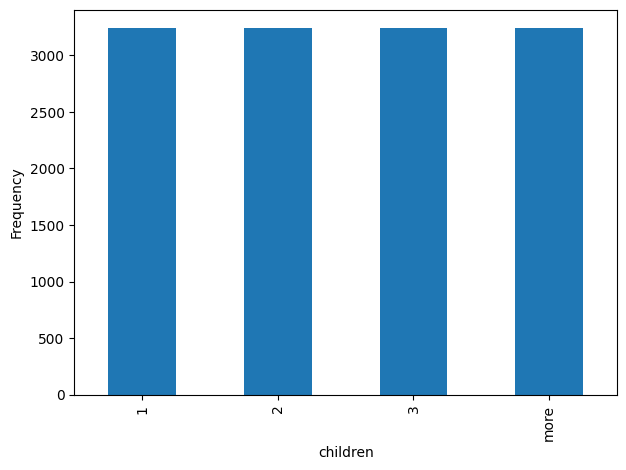

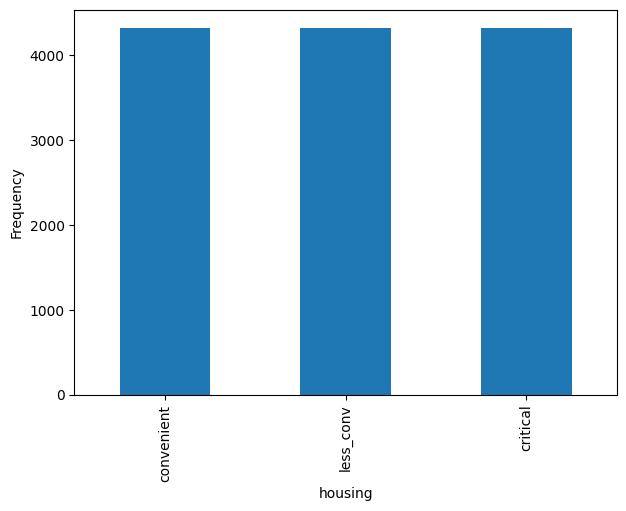

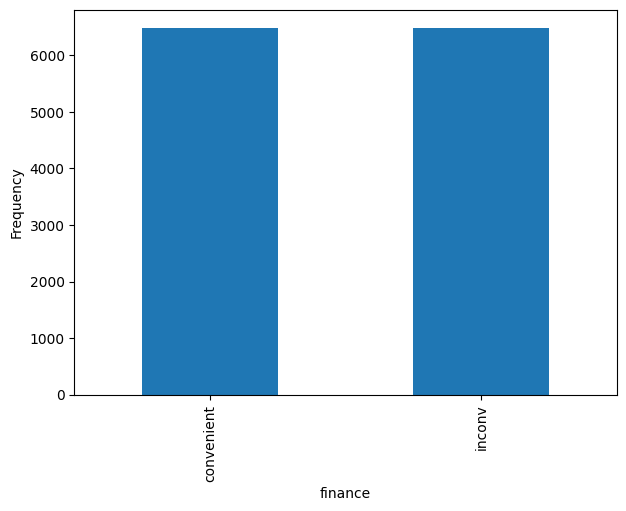

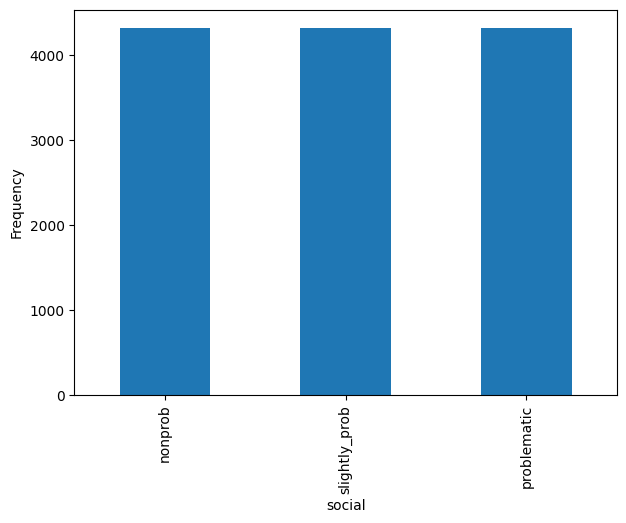

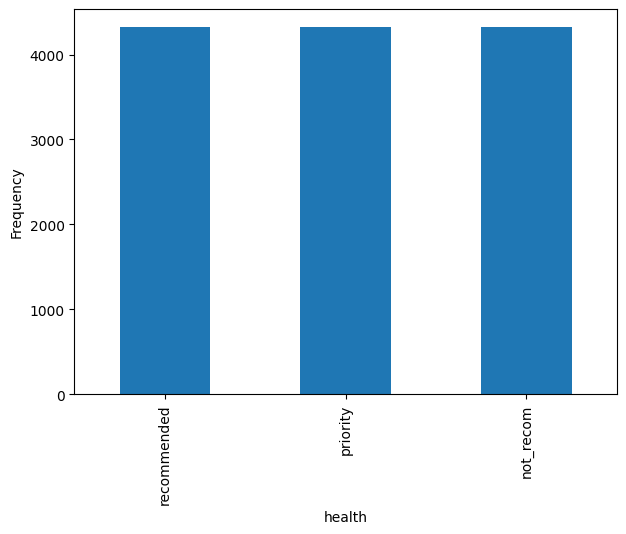

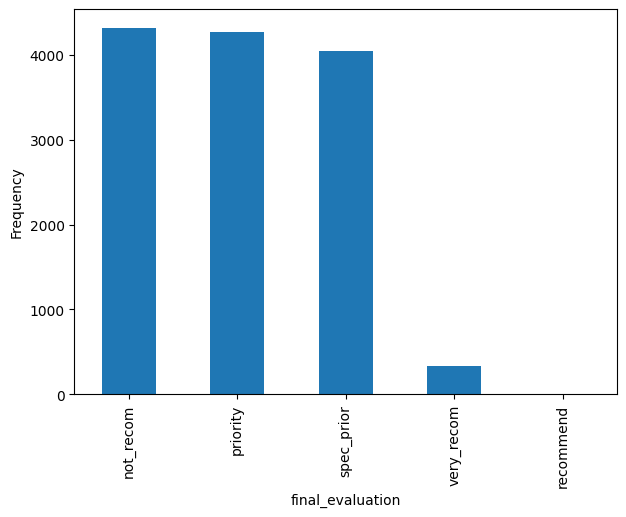

In [ ]:
#Barplot for nominal data
for i in data:
  f, ax = plt.subplots(figsize=(7, 5))
  ax.xaxis.grid(False)
  data[i].value_counts().plot(kind="bar")
  ax.set(ylabel="Frequency")
  ax.set(xlabel= data[i].name)
  plt.show()

## After Data Processing

### Correlation Matrix

In [ ]:
#Correlation between the attributes
correlation_matrix=vData.corr()
correlation_matrix.style.background_gradient(cmap='Blues').set_precision(2)

<ipython-input-140-9ba18e6c5a63>:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlation_matrix.style.background_gradient(cmap='Blues').set_precision(2)


,parents,has_nurs,form,children,housing,finance,social,health,final_evaluation
parents,1.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.14
has_nurs,-0.00,1.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.01
form,0.00,0.00,1.00,-0.00,0.00,-0.00,-0.00,0.00,0.02
children,-0.00,0.00,-0.00,1.00,-0.00,-0.00,-0.00,0.00,0.03
housing,-0.00,-0.00,0.00,-0.00,1.00,-0.00,0.00,0.00,0.02
finance,0.00,0.00,-0.00,-0.00,-0.00,1.00,-0.00,0.00,0.02
social,0.00,0.00,-0.00,-0.00,0.00,-0.00,1.00,0.00,-0.00
health,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.62
final_evaluation,-0.14,0.01,0.02,0.03,0.02,0.02,-0.00,0.62,1.00


### Boxplot

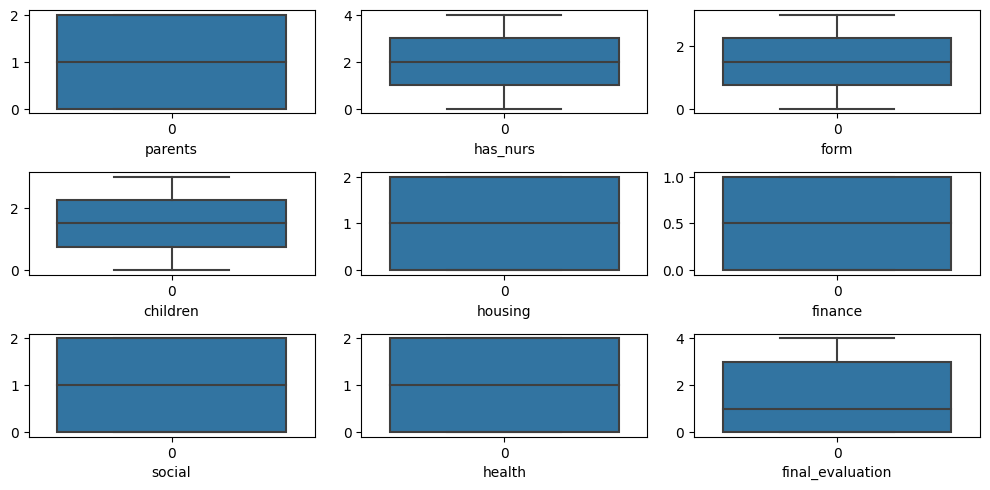

In [ ]:
#Boxplot
fig, axs = plt.subplots(3,3, figsize = (10,5))
plt1 = sns.boxplot(vData['parents'],ax = axs[0,0])
plt1.set(xlabel="parents")
plt2 = sns.boxplot(vData['has_nurs'], ax = axs[0,1])
plt2.set(xlabel="has_nurs")
plt3 = sns.boxplot(vData['form'], ax = axs[0,2])
plt3.set(xlabel="form")

plt1 = sns.boxplot(vData['children'], ax = axs[1,0])
plt1.set(xlabel="children")
plt2 = sns.boxplot(vData['housing'], ax = axs[1,1])
plt2.set(xlabel="housing")
plt3 = sns.boxplot(vData['finance'], ax = axs[1,2])
plt3.set(xlabel="finance")

plt1 = sns.boxplot(vData['social'], ax = axs[2,0])
plt1.set(xlabel="social")
plt2 = sns.boxplot(vData['health'], ax = axs[2,1])
plt2.set(xlabel="health")
plt3 = sns.boxplot(vData['final_evaluation'], ax = axs[2,2])
plt3.set(xlabel="final_evaluation")

plt.tight_layout()

# 4- Machine Learning Algorithm

In [ ]:
#Split the data into features X and target Y
X = pData.drop("final_evaluation",axis=1)
Y = pData["final_evaluation"]

In [ ]:
X

,parents,has_nurs,form,children,housing,finance,social,health
0,2,3,0,0,0,0,0,2
1,2,3,0,0,0,0,0,1
2,2,3,0,0,0,0,0,0
3,2,3,0,0,0,0,2,2
4,2,3,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...
12955,0,4,2,3,1,1,2,1
12956,0,4,2,3,1,1,2,0
12957,0,4,2,3,1,1,1,2
12958,0,4,2,3,1,1,1,1


In [ ]:
Y

0        2
1        1
2        0
3        2
4        1
        ..
12955    3
12956    0
12957    3
12958    3
12959    0
Name: final_evaluation, Length: 12960, dtype: int64

In [ ]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train

,parents,has_nurs,form,children,housing,finance,social,health
6308,1,1,1,0,1,0,1,0
6444,1,1,1,3,2,0,0,2
1256,2,2,1,3,0,1,2,0
11186,0,1,2,3,0,0,1,0
9750,0,2,1,0,2,1,2,2
...,...,...,...,...,...,...,...,...
2956,2,0,1,2,1,0,2,1
3675,2,4,1,0,0,0,2,2
8763,0,3,0,2,0,1,1,2
10685,0,1,1,1,1,1,0,0


In [ ]:
y_train

6308     0
6444     1
1256     0
11186    0
9750     1
        ..
2956     3
3675     1
8763     3
10685    0
12541    3
Name: final_evaluation, Length: 10368, dtype: int64

In [ ]:
X_test

,parents,has_nurs,form,children,housing,finance,social,health
12518,0,4,1,3,1,0,1,0
9,2,3,0,0,0,1,0,2
2692,2,0,0,1,1,1,0,1
5177,1,3,2,3,1,1,0,0
7473,1,0,3,2,2,0,2,2
...,...,...,...,...,...,...,...,...
4622,1,3,1,1,2,1,2,0
2235,2,1,3,1,2,0,2,2
11441,0,0,0,3,1,1,0,0
9315,0,3,2,0,2,1,0,2


In [ ]:
y_test

12518    0
9        4
2692     3
5177     0
7473     3
        ..
4622     0
2235     1
11441    0
9315     1
1137     4
Name: final_evaluation, Length: 2592, dtype: int64

## Random Forest

### Feature Selection

In [ ]:
#Random Forest Classifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)

#Create the RFE object and rank each pixel
#estrimatior is the classifior that im working with which is RFC
print("Random Forest Classifier")
for i in range (2,9):
    rfe = RFE(estimator= rfc, n_features_to_select= i)
    rfe.fit(X,Y)
    pred=rfe.predict(X)
    Accuracy= accuracy_score(Y,pred)
    print("Number of selected features:",rfe.n_features_,"Accuracy: ",Accuracy)

Random Forest Classifier
Number of selected features: 2 Accuracy:  0.8316358024691358
Number of selected features: 3 Accuracy:  0.8921296296296296
Number of selected features: 4 Accuracy:  0.9013888888888889
Number of selected features: 5 Accuracy:  0.9305555555555556
Number of selected features: 6 Accuracy:  0.942283950617284
Number of selected features: 7 Accuracy:  0.9657407407407408
Number of selected features: 8 Accuracy:  1.0


### Evaluating and Visualizing the Model

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9822530864197531


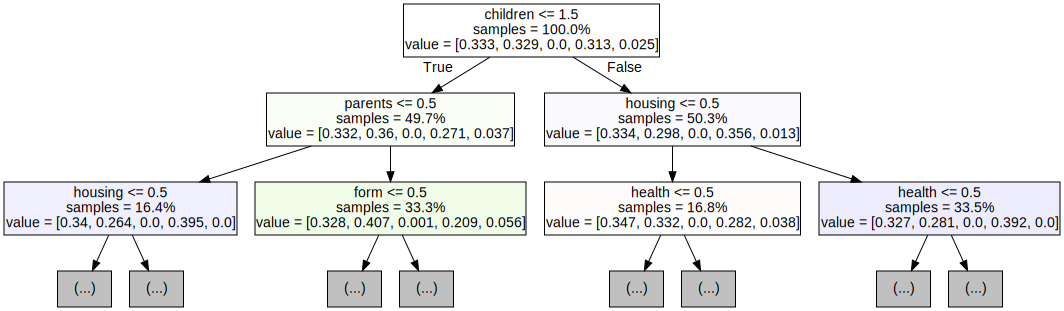

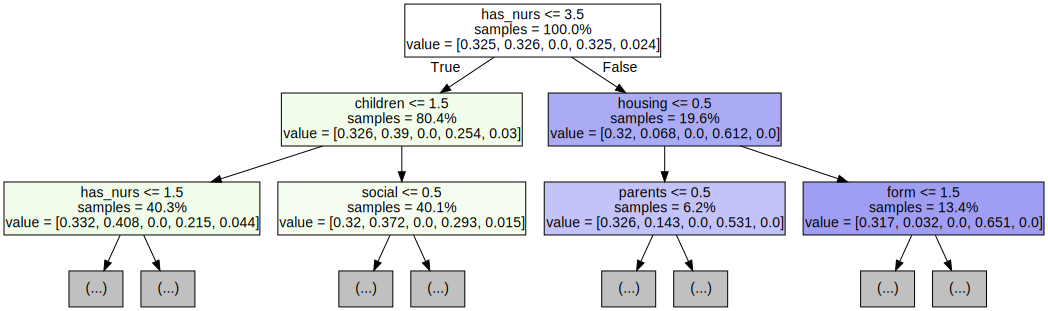

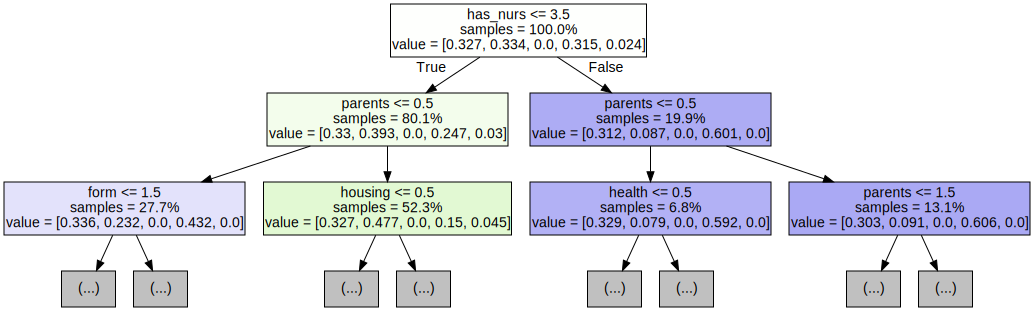

In [ ]:
# Export the first three decision trees from the forest
from sklearn.tree import export_graphviz
import graphviz

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

# 5- Descriptive Statistics



```
The mean and median of nominal data cannot be calculated even if the data is arranged in alphabetical order, only the mode can be used.
```



In [ ]:
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3 - Q1
IQR

parents     2.0
has_nurs    2.0
form        2.0
children    3.0
housing     2.0
finance     1.0
social      2.0
health      2.0
dtype: float64

In [ ]:
Q1

parents     0.0
has_nurs    1.0
form        0.0
children    0.0
housing     0.0
finance     0.0
social      0.0
health      0.0
Name: 0.25, dtype: float64

In [ ]:
Q3

parents     2.0
has_nurs    3.0
form        2.0
children    3.0
housing     2.0
finance     1.0
social      2.0
health      2.0
Name: 0.75, dtype: float64

In [ ]:
outlier = (X_train.min() < Q1-1.5*IQR) | (X_train.max() > Q3+1.5*IQR)
outlier

parents     False
has_nurs    False
form        False
children    False
housing     False
finance     False
social      False
health      False
dtype: bool



```
No outliers
```



In [ ]:
outlier_index = ((X_train < (Q1 - 1.5 * IQR)) |(X_train > (Q3 + 1.5 * IQR))).any(axis=1)

outlier_index

6308     False
6444     False
1256     False
11186    False
9750     False
         ...  
2956     False
3675     False
8763     False
10685    False
12541    False
Length: 10368, dtype: bool



```
No outliers in any index in the dataset
```



In [ ]:
#Mode of the given set
import statistics

mode = statistics.mode(X_train)

# printing the estimated mode to the users
print("Mode of given of data values is", mode)


Mode of given of data values is parents


In [ ]:
#Q1,Q2,Q3
quantiles = np.percentile(X_train, [25, 50, 75])

print(f"25th Percentile (Q1): {quantiles[0]}")
print(f"50th Percentile (Q2/Median): {quantiles[1]}")
print(f"75th Percentile (Q3): {quantiles[2]}")

25th Percentile (Q1): 0.0
50th Percentile (Q2/Median): 1.0
75th Percentile (Q3): 2.0
